In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split   #sklearn is one of many python APIs that exist
from sklearn.metrics import accuracy_score
import pickle

In [40]:
input_file = './troop_movements.csv'
dataset = pd.read_csv(input_file)
df = pd.DataFrame(dataset); df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2023-10-10 09:31:50,1,at-st,empire,2,2,6,5,Eriadu
1,2023-10-10 09:31:49,2,tie_fighter,empire,1,3,6,4,Kashyyyk
2,2023-10-10 09:31:48,3,tie_silencer,empire,8,5,10,9,Dagobah
3,2023-10-10 09:31:47,4,x-wing,resistance,3,2,5,10,Dathomir
4,2023-10-10 09:31:46,5,unknown,empire,9,6,3,10,Ojom
...,...,...,...,...,...,...,...,...,...
995,2023-10-10 09:15:15,996,at-at,resistance,1,7,4,1,Quermia
996,2023-10-10 09:15:14,997,tie_silencer,resistance,2,8,9,6,Troiken
997,2023-10-10 09:15:13,998,tie_fighter,resistance,8,9,3,7,Haruun Kal
998,2023-10-10 09:15:12,999,tie_fighter,resistance,3,1,9,9,Tund


In [43]:

#e_v_r_count = df["empire_or_resistance"].value_counts()
#e_v_r_count = e_v_r_count.to_frame()
# e_v_r_count = df.groupby(['empire_or_resistance']).count().drop(columns=['timestamp', 'unit_id', 'unit_type', 'location_x', 'location_y', 'destination_x', 'destination_y']); e_v_r_count
# count = e_v_r_count.rename(columns={"homeworld": "Count"})
# count

df['count'] = df['empire_or_resistance'].map(
    df['empire_or_resistance'].value_counts())
e_o_r = df.drop(columns=['timestamp', 'unit_id',
        'unit_type', 'location_x', 'location_y', 'destination_x', 'destination_y', 'homeworld']).drop_duplicates().reset_index().drop(columns=['index'])
e_o_r

,empire_or_resistance,count
0,empire,508
1,resistance,492


In [45]:
df['count'] = df['homeworld'].map(
    df['homeworld'].value_counts())
homeworld = df.drop(columns=['timestamp', 'unit_id',
        'unit_type', 'location_x', 'location_y', 'destination_x', 'destination_y', 'empire_or_resistance']).drop_duplicates().reset_index().drop(columns=['index'])
homeworld

,homeworld,count
0,Eriadu,30
1,Kashyyyk,27
2,Dagobah,19
3,Dathomir,29
4,Ojom,28
5,Sullust,26
6,Aleen Minor,20
7,Tholoth,32
8,Alderaan,13
9,Troiken,22


In [47]:
df['count'] = df['unit_type'].map(
    df['unit_type'].value_counts())
unit_type = df.drop(columns=['timestamp', 'unit_id',
        'empire_or_resistance', 'location_x', 'location_y', 'destination_x', 'destination_y', 'homeworld']).drop_duplicates().reset_index().drop(columns=['index'])
unit_type

,unit_type,count
0,at-st,110
1,tie_fighter,130
2,tie_silencer,115
3,x-wing,123
4,unknown,140
5,resistance_soldier,143
6,stormtrooper,108
7,at-at,131


In [52]:
df['is_resistance'] = df['empire_or_resistance'].map(lambda x: True if x=='resistance' else False); df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,count,is_resistance
0,2023-10-10 09:31:50,1,at-st,empire,2,2,6,5,Eriadu,110,False
1,2023-10-10 09:31:49,2,tie_fighter,empire,1,3,6,4,Kashyyyk,130,False
2,2023-10-10 09:31:48,3,tie_silencer,empire,8,5,10,9,Dagobah,115,False
3,2023-10-10 09:31:47,4,x-wing,resistance,3,2,5,10,Dathomir,123,True
4,2023-10-10 09:31:46,5,unknown,empire,9,6,3,10,Ojom,140,False
...,...,...,...,...,...,...,...,...,...,...,...
995,2023-10-10 09:15:15,996,at-at,resistance,1,7,4,1,Quermia,131,True
996,2023-10-10 09:15:14,997,tie_silencer,resistance,2,8,9,6,Troiken,115,True
997,2023-10-10 09:15:13,998,tie_fighter,resistance,8,9,3,7,Haruun Kal,130,True
998,2023-10-10 09:15:12,999,tie_fighter,resistance,3,1,9,9,Tund,130,True


[Text(0.5, 1.0, 'Character Count by Empire or Resistance')]

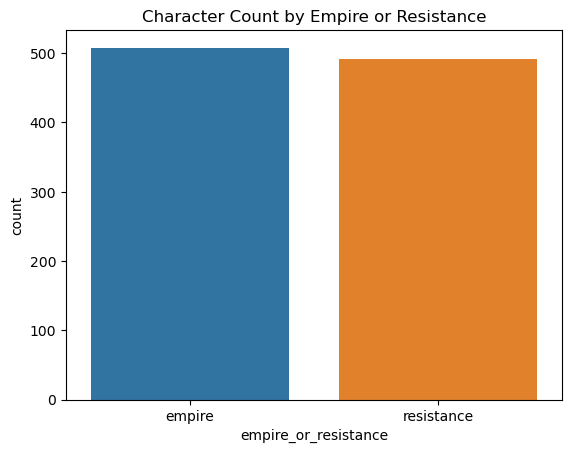

In [59]:

sns.barplot(data=e_o_r, x="empire_or_resistance", y="count").set(title='Character Count by Empire or Resistance')

In [67]:
X = df[['homeworld', 'unit_type']]
y = df['empire_or_resistance']
X_encoded = pd.get_dummies(X)
y_encoded = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

model = DecisionTreeClassifier() #This saves the model to use again
model.fit(X_train, y_train)

y_pred = model.predict(X_test)   #This makes the predictions
accuracy = accuracy_score(y_test, y_pred)

#print(y_pred)
print(accuracy)

0.435


[Text(0.5, 1.0, 'Feature Importances')]

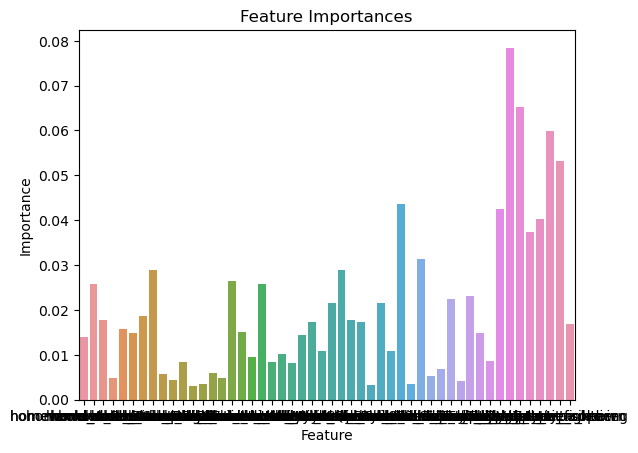

In [69]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
#print(feature_importances)
sns.barplot(data=feature_importances, x="Feature", y="Importance").set(title='Feature Importances')

In [71]:
filename = 'trained_model.pkl'
#.pkl is common name for pickle file

with open(filename, 'wb') as file:
         pickle.dump(model, file)